In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [28]:
df=pd.read_csv('training.csv', index_col=0)
df_test=pd.read_csv('testing.csv', index_col=0)

In [29]:
rollmean_1 = df.temperature.rolling(window=1).mean()
rollmean_1 = rollmean_1.values.reshape(len(rollmean_1),1)
rollmean_1=np.delete(rollmean_1, -1)
rollmean_1 = np.insert(rollmean_1, 0, np.nan, axis=0)
rollmean_1 = rollmean_1.reshape(len(rollmean_1),1)
rollmean_1[:1]=df[:1]

errors=rollmean_1 - df.temperature.values
#print (errors)

rollmean_2 = df.temperature.rolling(window=2).mean()
rollmean_2 = rollmean_2.values.reshape(len(rollmean_2),1)
rollmean_2=np.delete(rollmean_2, -1)
rollmean_2 = np.insert(rollmean_2, 0, np.nan, axis=0)
rollmean_2 = rollmean_2.reshape(len(rollmean_2),1)
rollmean_2[:2]=df[:2]


rollmean_3= df.temperature.rolling(window=3).mean()
rollmean_3 = rollmean_3.values.reshape(len(rollmean_3),1)
rollmean_3=np.delete(rollmean_3, -1)
rollmean_3 = np.insert(rollmean_3, 0, np.nan, axis=0)
rollmean_3 = rollmean_3.reshape(len(rollmean_3),1)
rollmean_3[:3]=df[:3]

rollmean_4 = df.temperature.rolling(window=4).mean()
rollmean_4 = rollmean_4.values.reshape(len(rollmean_4),1)
rollmean_4=np.delete(rollmean_4, -1)
rollmean_4 = np.insert(rollmean_4, 0, np.nan, axis=0)
rollmean_4 = rollmean_4.reshape(len(rollmean_4),1)
rollmean_4[:4]=df[:4]

rollmean_5 = df.temperature.rolling(window=5).mean()
rollmean_5 = rollmean_5.values.reshape(len(rollmean_5),1)
rollmean_5=np.delete(rollmean_5, -1)
rollmean_5 = np.insert(rollmean_5, 0, np.nan, axis=0)
rollmean_5 = rollmean_5.reshape(len(rollmean_5),1)
rollmean_5[:5]=df[:5]

rollmean_10 = df.temperature.rolling(window=10).mean()
rollmean_10 = rollmean_10.values.reshape(len(rollmean_10),1)
rollmean_10=np.delete(rollmean_10, -1)
rollmean_10 = np.insert(rollmean_10, 0, np.nan, axis=0)
rollmean_10 = rollmean_10.reshape(len(rollmean_10),1)
rollmean_10[:10]=df[:10]

In [30]:
k=[1,2,3,4,5,10]
error=[0]*6
error[0] = sqrt(mean_squared_error(df.temperature,rollmean_1 ))
print('(k=1) RMSE: %.3f' % error[0])
error[1] = sqrt(mean_squared_error(df.temperature,rollmean_2 ))
print('(k=2) RMSE: %.3f' % error[1])
error[2] = sqrt(mean_squared_error(df.temperature,rollmean_3 ))
print('(k=3) RMSE: %.3f' % error[2])
error[3] = sqrt(mean_squared_error(df.temperature,rollmean_4 ))
print('(k=4) RMSE: %.3f' % error[3])
error[4] = sqrt(mean_squared_error(df.temperature,rollmean_5 ))
print('(k=5) RMSE: %.3f' % error[4])
error[5] = sqrt(mean_squared_error(df.temperature,rollmean_10 ))
print('(k=10) RMSE: %.3f' % error[5])

(k=1) RMSE: 1.945
(k=2) RMSE: 2.715
(k=3) RMSE: 3.418
(k=4) RMSE: 4.062
(k=5) RMSE: 4.652
(k=10) RMSE: 6.842


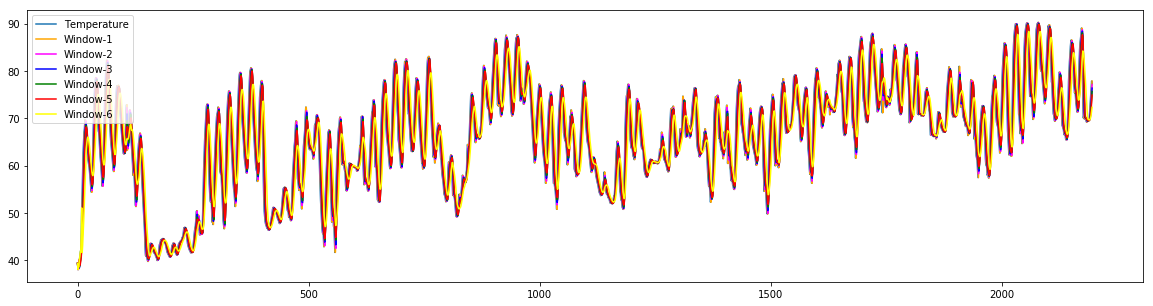

In [31]:
plt.figure(figsize=(20,5))
plt.plot(df.temperature, label='Temperature')
plt.plot(rollmean_1, label='Window-1', color='orange')
plt.plot(rollmean_2, label='Window-2', color='magenta')
plt.plot(rollmean_3, label='Window-3', color='blue')
plt.plot(rollmean_4, label='Window-4', color='green')
plt.plot(rollmean_5, label='Window-5', color='red')
plt.plot(rollmean_10, label='Window-6', color='yellow')
plt.legend(loc='upper left')
plt.show()

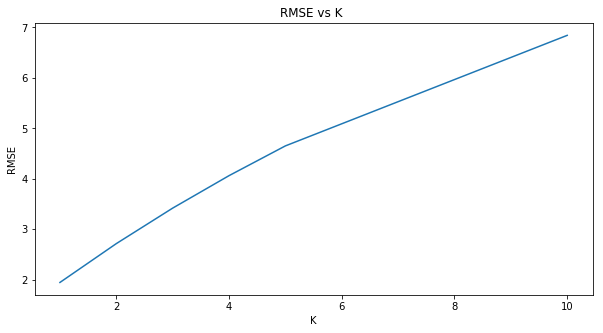

In [32]:
plt.figure(figsize=(10,5))
plt.plot(k,error)
plt.title("RMSE vs K ")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

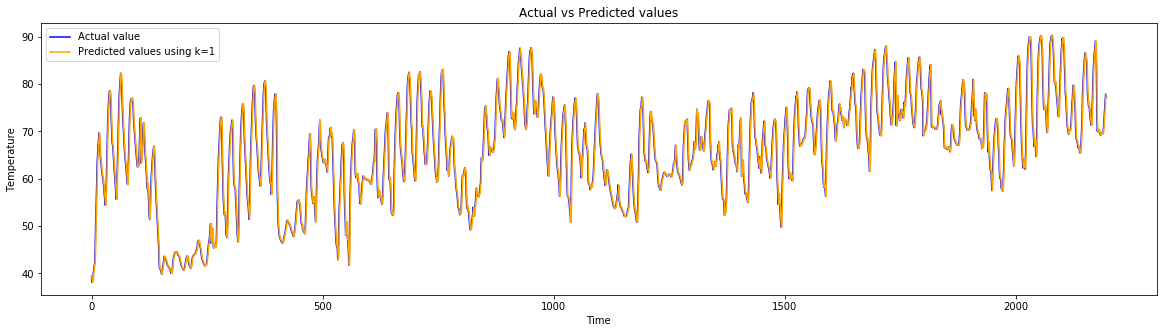

In [42]:
plt.figure(figsize=(20,5))
plt.title("Actual vs Predicted values")
plt.plot(df.temperature, label='Actual value', color='blue')
plt.plot(rollmean_1, label='Predicted values using k=1', color='orange')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend(loc='upper left')
plt.show()

In [37]:
#On testing data
rollmean= df_test.temperature.rolling(window=1).mean()
rollmean = rollmean.values.reshape(len(rollmean),1)
rollmean=np.delete(rollmean, -1)
rollmean = np.insert(rollmean, 0, np.nan, axis=0)
rollmean = rollmean.reshape(len(rollmean),1)
rollmean[:1]=df_test[:1]

In [38]:
err = sqrt(mean_squared_error(df_test.temperature,rollmean ))
print('(k=1) RMSE: %.3f' % err)

(k=1) RMSE: 1.921
